### DATA ANALYSIS VISUALIZATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('dataset_part_2.csv')

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


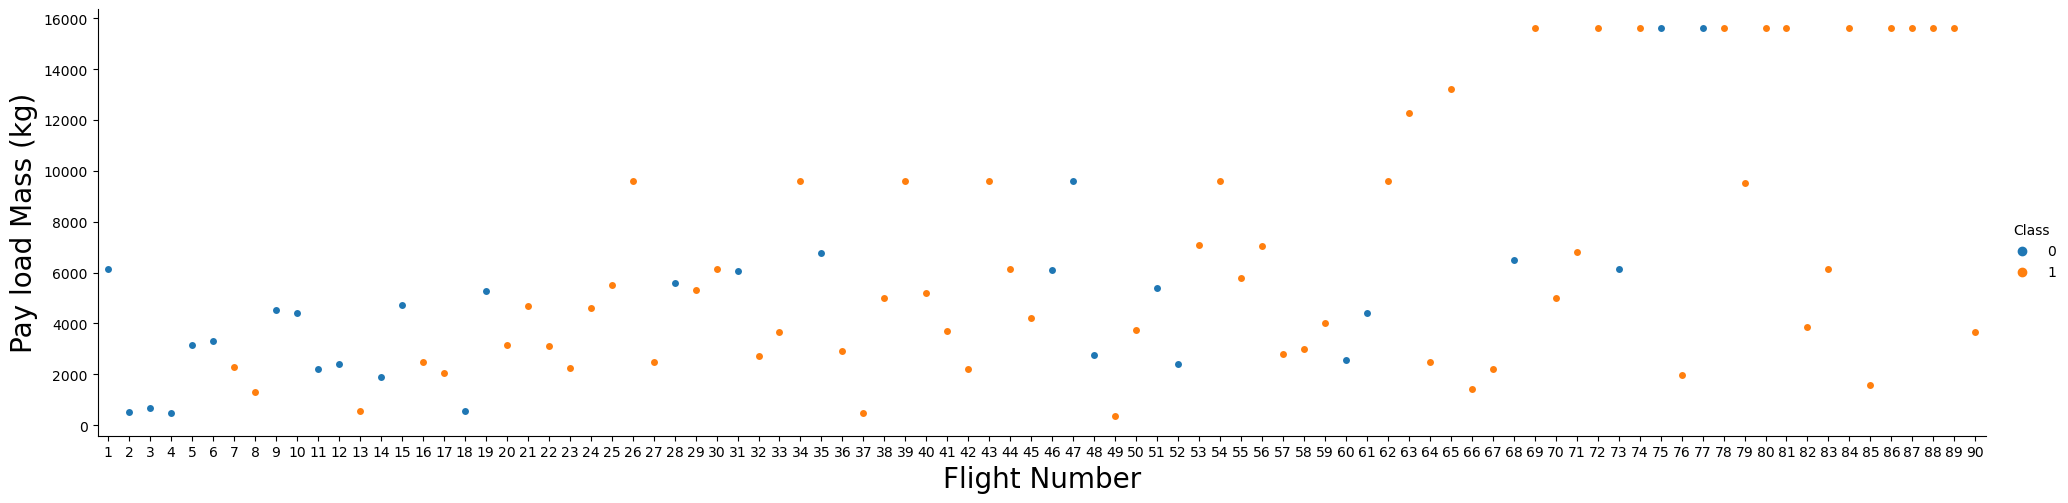

In [4]:
sns.catplot(y='PayloadMass', x='FlightNumber' , hue='Class' , data=df , aspect=4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show() 

### task1  

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


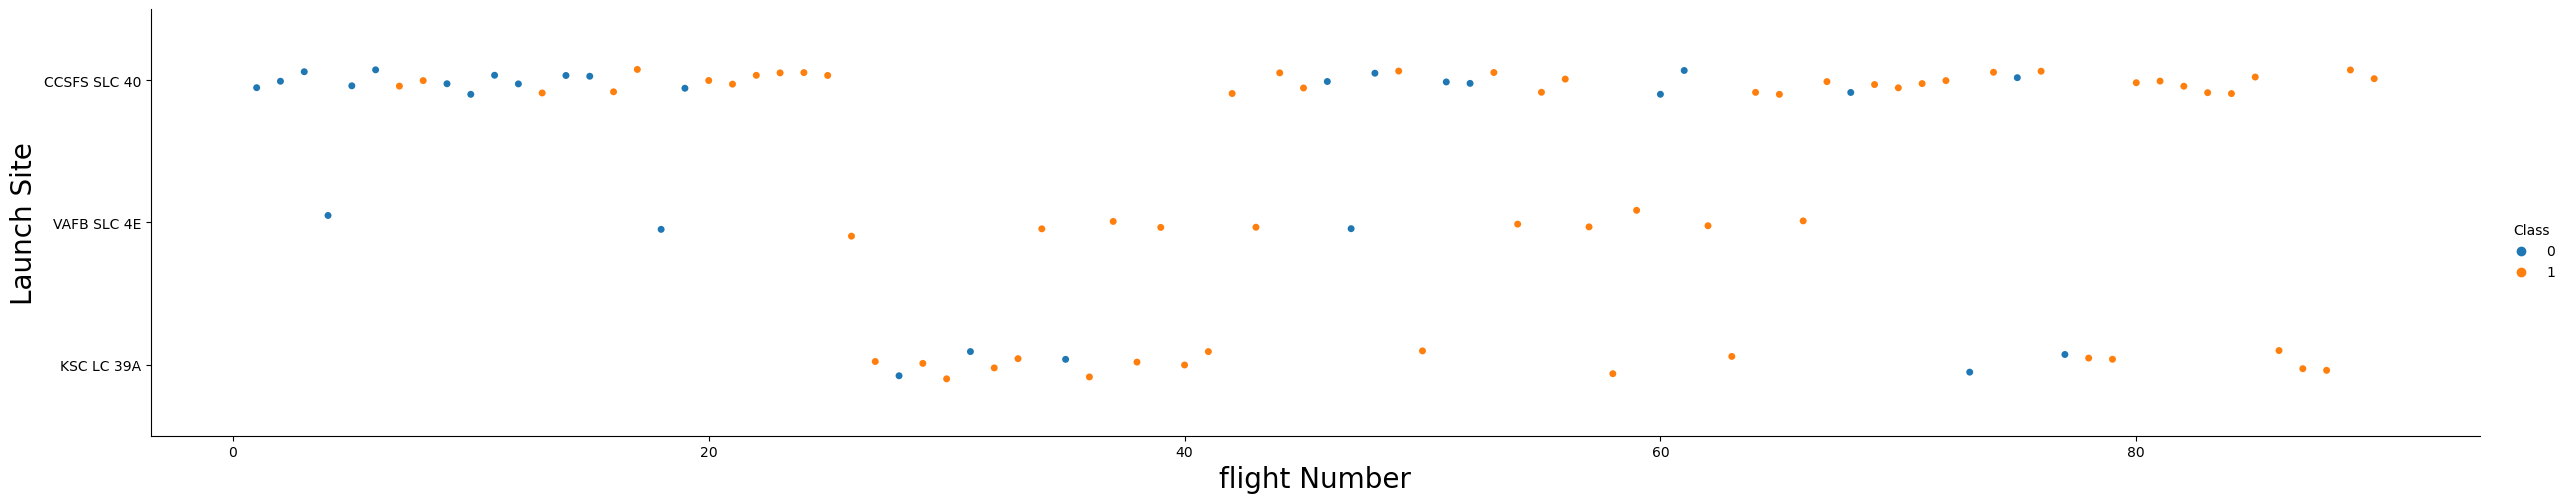

In [5]:
sns.catplot(y='LaunchSite',x='FlightNumber',hue='Class',data=df,aspect=5)
plt.xlabel("flight Number",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


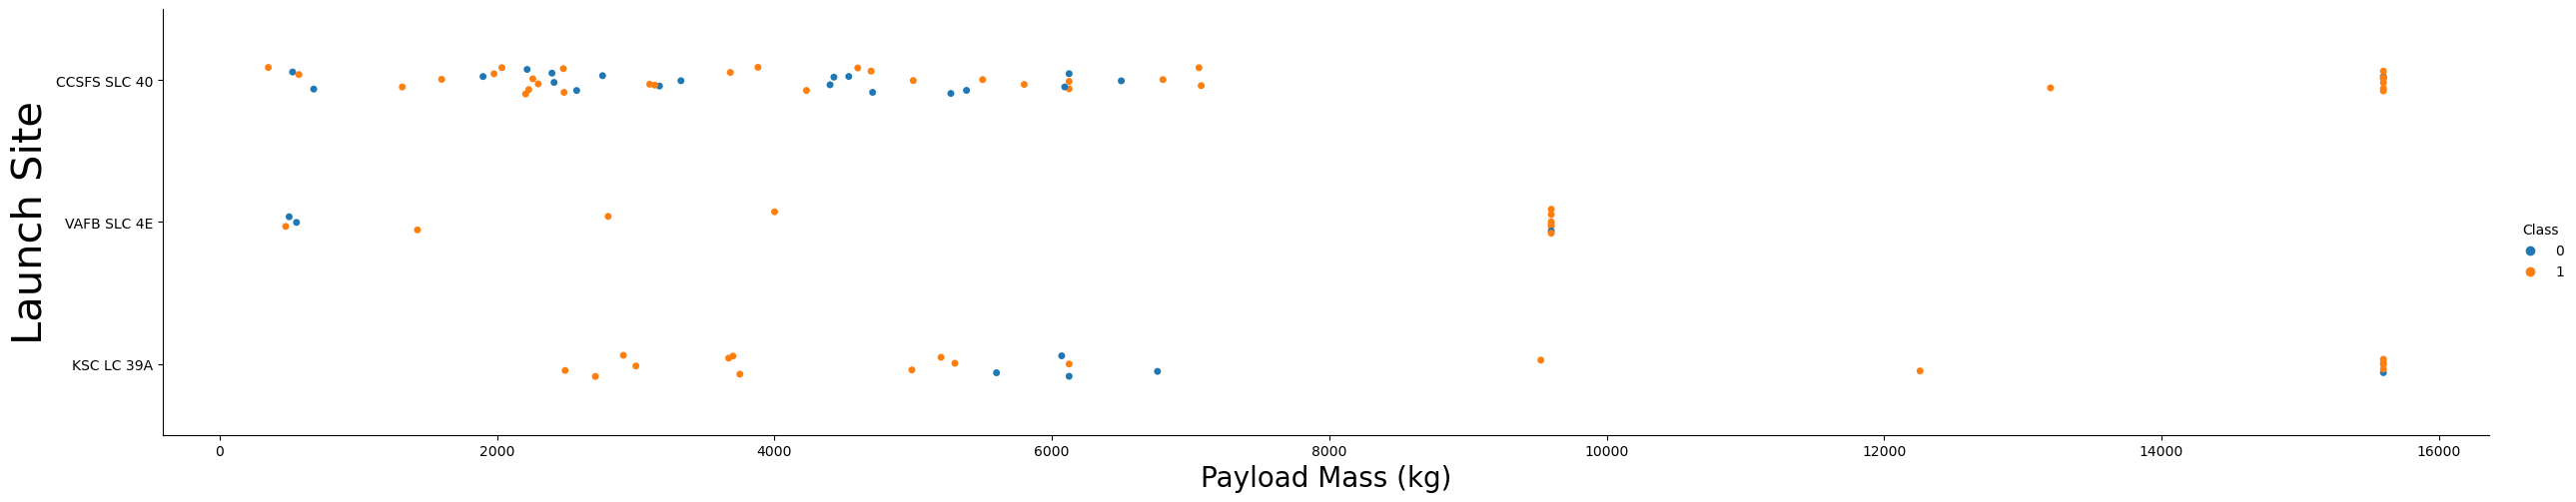

In [7]:


sns.catplot(y='LaunchSite',x='PayloadMass',hue="Class",data=df,aspect=5)
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Launch Site' , fontsize=30)
plt.show()

## task 3 

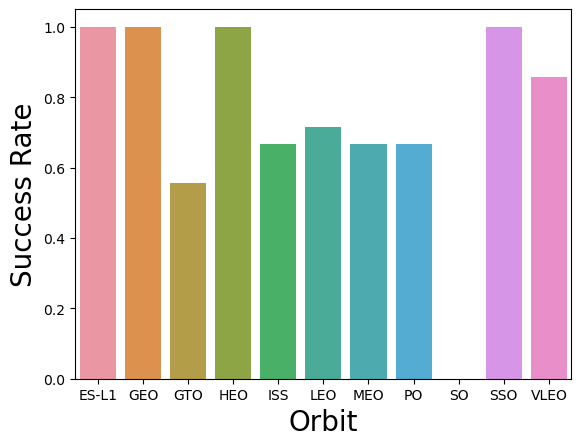

In [8]:
orbit_success_rate= df.groupby("Orbit")['Class'].mean().reset_index()
sns.barplot(x='Orbit',y='Class',data=orbit_success_rate)
plt.xlabel('Orbit',fontsize=20)
plt.ylabel('Success Rate',fontsize=20)
plt.show()

# task4

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


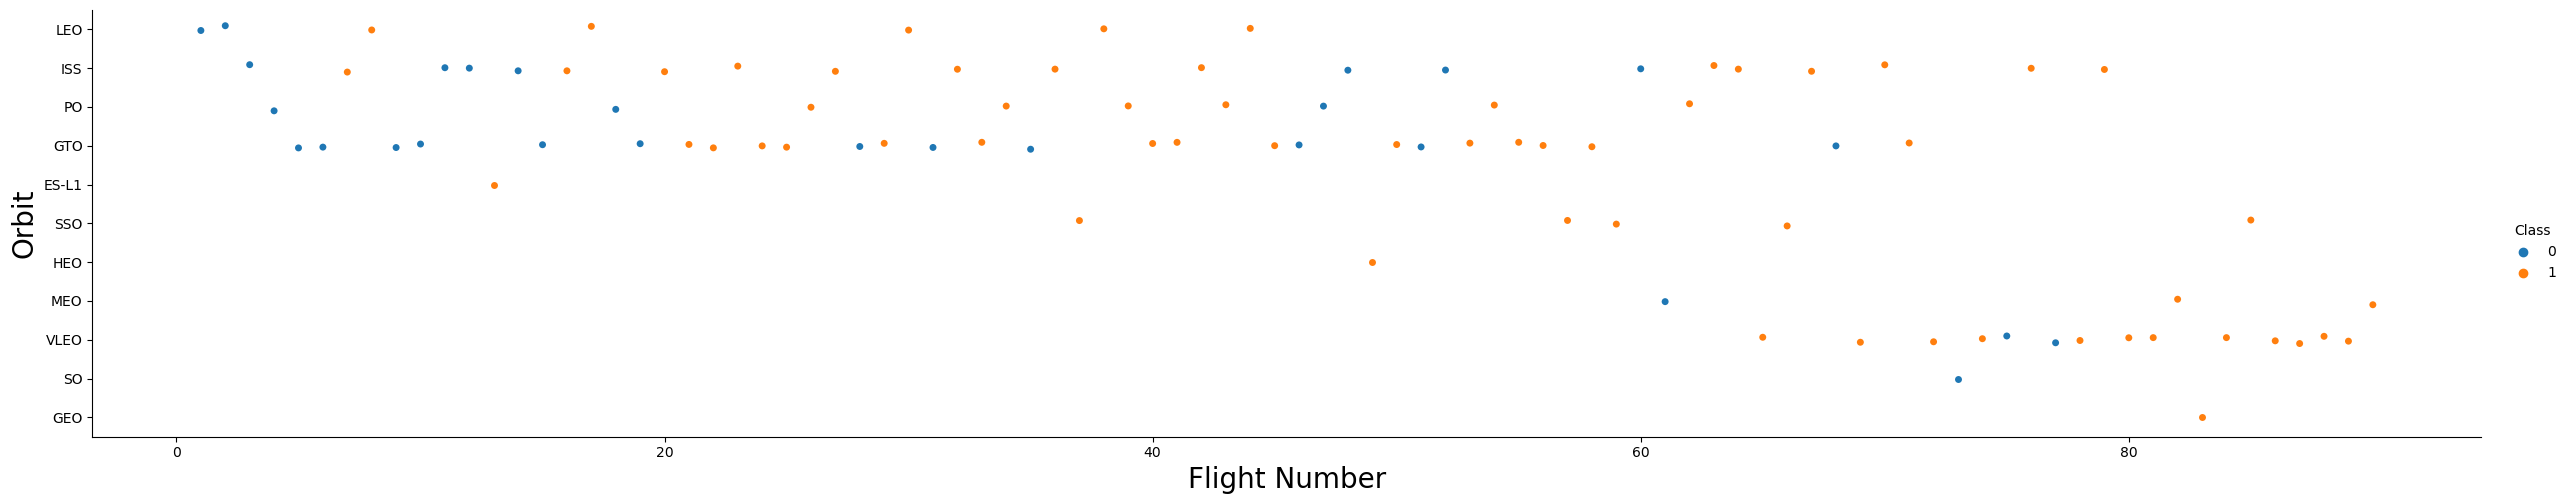

In [9]:
sns.catplot(y='Orbit',x='FlightNumber',hue='Class',data=df,aspect=5)
plt.xlabel('Flight Number',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

# task5 

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


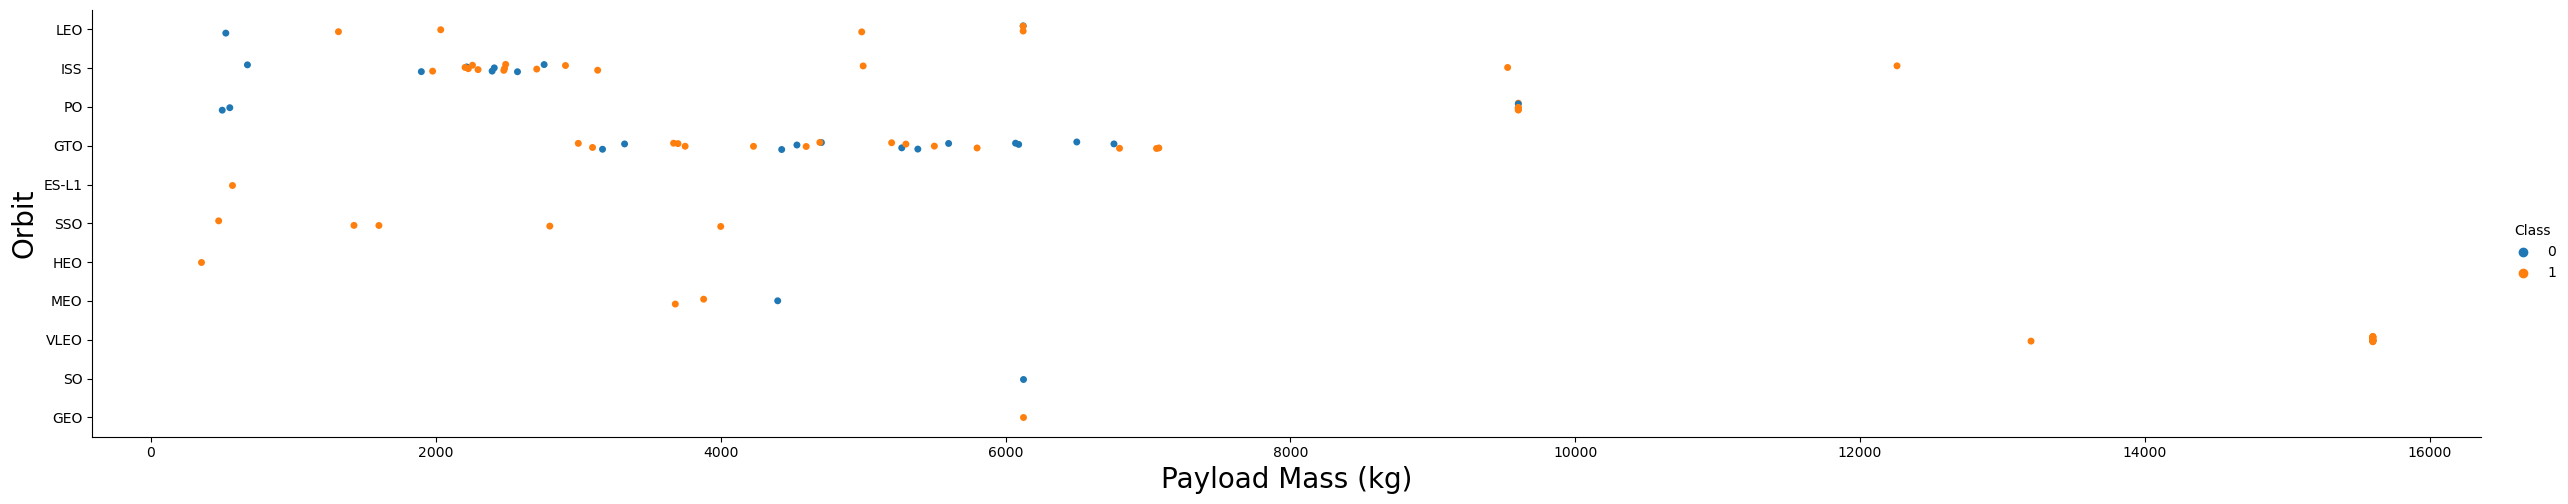

In [10]:
sns.catplot(y='Orbit',x='PayloadMass',hue='Class',data=df,aspect=5)
plt.xlabel('Payload Mass (kg)',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

# task6 

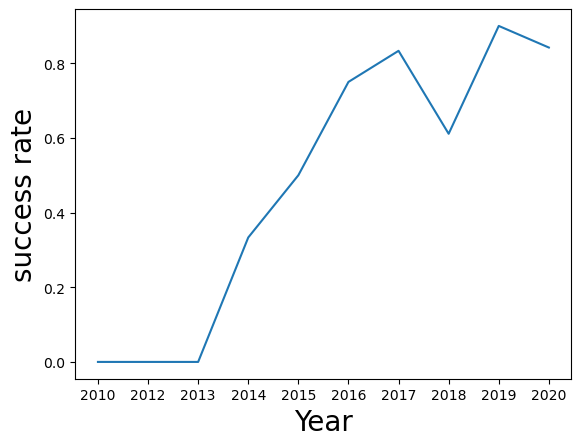

In [12]:
year=[]
def Extract_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Year']=year

yearly_success_rate=df.groupby('Year')['Class'].mean().reset_index()
sns.lineplot(x='Year',y='Class',data=yearly_success_rate)
plt.xlabel('Year',fontsize=20)
plt.ylabel('success rate',fontsize=20)
plt.show()



# task7 

In [21]:
features= df[['FlightNumber','PayloadMass','Orbit','LaunchSite','GridFins','Reused','Legs','LandingPad','Block','ReusedCount','Serial']]
features_one_hot= pd.get_dummies(features,columns=['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,False,False,False,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,False,False,False,1.0,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# task8 

In [24]:
features_one_hot=features_one_hot.astype('float64')
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 79 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   GridFins                             90 non-null     float64
 3   Reused                               90 non-null     float64
 4   Legs                                 90 non-null     float64
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     float64
 7   Orbit_ES-L1                          90 non-null     float64
 8   Orbit_GEO                            90 non-null     float64
 9   Orbit_GTO                            90 non-null     float64
 10  Orbit_HEO                            90 non-null     float64
 11  Orbit_ISS                         

In [25]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)